In [1]:
import sys
sys.path.append('/workspace/Documents')

import argparse
import os
import sys
import subprocess
import nibabel as nb

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import Diffusion_denoising_thin_slice.Build_lists.Build_list as Build_list
import Diffusion_denoising_thin_slice.functions_collection as ff
import Diffusion_denoising_thin_slice.Data_processing as Data_processing

/usr/local/lib/python3.8/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
build_sheet =  Build_list.Build(os.path.join('/mnt/camca_NAS/denoising/Patient_lists/fixedCT_static_simulation_train_test_gaussian_NAS.xlsx'))
_,patient_id_list,patient_subid_list,random_num_list, condition_list, x0_list = build_sheet.__build__(batch_list = [5]) 
n = ff.get_X_numbers_in_interval(total_number = patient_id_list.shape[0],start_number = 0,end_number = 1, interval = 2)

In [4]:
avg_slice = False

results = []
for i in range(0,1):
    patient_id = patient_id_list[n[i]]
    patient_subid = patient_subid_list[n[i]]
    random_n = random_num_list[n[i]]
    print(patient_id, patient_subid, random_n)

    gt_file = os.path.join('/mnt/camca_NAS/denoising/models/unsupervised_gaussian_2D_mean_beta10/pred_images', patient_id, patient_subid,'random_'+str(random_n), 'epoch56_1/gt_img.nii.gz')
    gt_img = nb.load(gt_file).get_fdata()
    # process gt
    shape = gt_img.shape
    gt_img_new = np.zeros((gt_img.shape[0], gt_img.shape[1], gt_img.shape[2]-2))
    for i in range(1, gt_img.shape[2]-1):
        gt_img_new[:,:,i-1] = np.mean(gt_img[:,:,i-1:i+2], axis = 2)
    gt_img = np.copy(gt_img_new) if avg_slice else np.copy(gt_img)
    gt_img_brain = Data_processing.cutoff_intensity(gt_img, cutoff_low=-100, cutoff_high=100)

    condition_file = os.path.join('/mnt/camca_NAS/denoising/models/unsupervised_gaussian_2D_mean_beta10/pred_images', patient_id, patient_subid,'random_'+str(random_n), 'epoch56_1/condition_img.nii.gz')
    condition_img = nb.load(condition_file).get_fdata() if avg_slice == False else nb.load(condition_file).get_fdata()[:,:,1:shape[2]-1]
    condition_img_brain = Data_processing.cutoff_intensity(condition_img, cutoff_low=-100, cutoff_high=100)

    n2n_file = os.path.join('/mnt/camca_NAS/denoising/models/noise2noise_2D/pred_images', patient_id, patient_subid,'random_'+str(random_n), 'epoch78/pred_img.nii.gz')
    n2n_img = nb.load(n2n_file).get_fdata() if avg_slice == False else nb.load(n2n_file).get_fdata()[:,:,1:shape[2]-1]
    n2n_img_brain = Data_processing.cutoff_intensity(n2n_img, cutoff_low=-100, cutoff_high=100)

    supervised_file = os.path.join('/mnt/camca_NAS/denoising/models/supervised_possion_2D/pred_images', patient_id, patient_subid,'random_'+str(random_n), 'epoch58_1/pred_img.nii.gz')
    supervised_img = nb.load(supervised_file).get_fdata() if avg_slice == False else nb.load(supervised_file).get_fdata()[:,:,1:shape[2]-1]
    supervised_img_brain = Data_processing.cutoff_intensity(supervised_img, cutoff_low=-100, cutoff_high=100)

    # ddpm_file = os.path.join('/mnt/camca_NAS/denoising/models/unsupervised_gaussian_2D_mean_beta10/pred_images', patient_id, patient_subid,'random_'+str(random_n), 'epoch56_1/pred_img.nii.gz')
    ddpm_file = os.path.join('/mnt/camca_NAS/denoising/models/unsupervised_gaussian_2D_1.25mm/pred_images_thin', patient_id, patient_subid,'random_'+str(random_n), 'epoch73_1/pred_img.nii.gz')
    ddpm_img = nb.load(ddpm_file).get_fdata() if avg_slice == False else nb.load(ddpm_file).get_fdata()[:,:,1:shape[2]-1]
    ddpm_img_brain = Data_processing.cutoff_intensity(ddpm_img, cutoff_low=-100, cutoff_high=100)

    # ddpm_beta0_file = os.path.join('/mnt/camca_NAS/denoising/models/unsupervised_gaussian_2D_mean_beta0/pred_images', patient_id, patient_subid,'random_'+str(random_n), 'epoch61_1/pred_img.nii.gz')
    # ddpm_beta0_img = nb.load(ddpm_beta0_file).get_fdata() if avg_slice == False else nb.load(ddpm_beta0_file).get_fdata()[:,:,1:shape[2]-1]
    # ddpm_beta0_img_brain = Data_processing.cutoff_intensity(ddpm_beta0_img, cutoff_low=-100, cutoff_high=100)

    # ddpm_beta20_file = os.path.join('/mnt/camca_NAS/denoising/models/unsupervised_gaussian_2D_mean_beta20/pred_images', patient_id, patient_subid,'random_'+str(random_n), 'epoch57_1/pred_img.nii.gz')
    # ddpm_beta20_img = nb.load(ddpm_beta20_file).get_fdata() if avg_slice == False else nb.load(ddpm_beta20_file).get_fdata()[:,:,1:shape[2]-1]
    # ddpm_beta20_img_brain = Data_processing.cutoff_intensity(ddpm_beta20_img, cutoff_low=-100, cutoff_high=100)

    # ddpm_avg_20_file = os.path.join('/mnt/camca_NAS/denoising/models/unsupervised_gaussian_2D_mean_beta10/pred_images', patient_id, patient_subid,'random_'+str(random_n), 'epoch56avg/pred_img_scans20.nii.gz')
    ddpm_avg_20_file = os.path.join('/mnt/camca_NAS/denoising/models/unsupervised_gaussian_2D_1.25mm/pred_images_thin', patient_id, patient_subid,'random_'+str(random_n), 'epoch73avg/pred_img_scans10.nii.gz')
    ddpm_avg_20_img = nb.load(ddpm_avg_20_file).get_fdata() if avg_slice == False else nb.load(ddpm_avg_20_file).get_fdata()[:,:,1:shape[2]-1]
    ddpm_avg_20_img_brain = Data_processing.cutoff_intensity(ddpm_avg_20_img, cutoff_low=-100, cutoff_high=100)

    # compare brain region
    mae_brain_motion, _, rmse_brain_motion, _, ssim_brain_motion,psnr_brain_motion = ff.compare(condition_img_brain, gt_img_brain, cutoff_low = 0, cutoff_high = 100)
    mae_brain_n2n, _, rmse_brain_n2n, _, ssim_brain_n2n,psnr_brain_n2n = ff.compare(n2n_img_brain, gt_img_brain, cutoff_low = 0, cutoff_high = 100)
    mae_brain_supervised, _, rmse_brain_supervised, _, ssim_brain_supervised,psnr_brain_supervised = ff.compare(supervised_img_brain, gt_img_brain, cutoff_low = 0, cutoff_high = 100)

    mae_brain_ddpm, _, rmse_brain_ddpm, _, ssim_brain_ddpm,psnr_brain_ddpm = ff.compare(ddpm_img_brain, gt_img_brain, cutoff_low = 0, cutoff_high = 100)
    # mae_brain_ddpm_beta0, _, rmse_brain_ddpm_beta0, _, ssim_brain_ddpm_beta0,psnr_brain_ddpm_beta0 = ff.compare(ddpm_beta0_img_brain, gt_img_brain, cutoff_low = 0, cutoff_high = 100)
    # mae_brain_ddpm_beta20, _, rmse_brain_ddpm_beta20, _, ssim_brain_ddpm_beta20,psnr_brain_ddpm_beta20 = ff.compare(ddpm_beta20_img_brain, gt_img_brain, cutoff_low = 0, cutoff_high = 100)
    mae_brain_ddpm_avg_20, _, rmse_brain_ddpm_avg_20, _, ssim_brain_ddpm_avg_20,psnr_brain_ddpm_avg_20 = ff.compare(ddpm_avg_20_img_brain, gt_img_brain, cutoff_low = 0, cutoff_high = 100)

    print('motion:', mae_brain_motion, rmse_brain_motion, ssim_brain_motion, psnr_brain_motion)
    print('n2n:', mae_brain_n2n, rmse_brain_n2n, ssim_brain_n2n, psnr_brain_n2n)
    print('supervised:', mae_brain_supervised, rmse_brain_supervised, ssim_brain_supervised, psnr_brain_supervised)
    print('ddpm:', mae_brain_ddpm, rmse_brain_ddpm, ssim_brain_ddpm, psnr_brain_ddpm)
    # print('ddpm_beta0:', mae_brain_ddpm_beta0, rmse_brain_ddpm_beta0, ssim_brain_ddpm_beta0, psnr_brain_ddpm_beta0)
    # print('ddpm_beta20:', mae_brain_ddpm_beta20, rmse_brain_ddpm_beta20, ssim_brain_ddpm_beta20, psnr_brain_ddpm_beta20)
    print('ddpm_avg_20:', mae_brain_ddpm_avg_20, rmse_brain_ddpm_avg_20, ssim_brain_ddpm_avg_20, psnr_brain_ddpm_avg_20)

00214841 0000455418 0
motion: 5.260292856563215 6.617573540262309 0.8624831569202692 23.58602447479702
n2n: 3.5155395727361616 5.394148238788432 0.9135871169349414 25.361542453905802
supervised: 2.5853319257967637 3.3926812423761765 0.9599654915355595 29.389138847063265
ddpm: 6.422756733302498 8.69566663485876 0.7808707858928676 21.21394236237371
ddpm_avg_20: 3.547684799248871 5.597623703274535 0.9081487064130207 25.039926001228242


In [8]:
# compare brain region
x= 257# case0:246
y = 249 # case 0: 214

condition_img_brain2 = condition_img_brain[x-50: x+50, y-50: y+50, 20:40]
gt_img_brain2 = gt_img_brain[x-50: x+50, y-50: y+50, 20:40]
supervised_img_brain2 = supervised_img_brain[x-50: x+50, y-50: y+50, 20:40]
ddpm_img_brain2 = ddpm_img_brain[x-50: x+50, y-50: y+50, 20:40]
# ddpm_beta0_img_brain2 = ddpm_beta0_img_brain[x-50: x+50, y-50: y+50, 20:40]
# ddpm_beta20_img_brain2 = ddpm_beta20_img_brain[x-50: x+50, y-50: y+50, 20:40]
ddpm_avg_20_img_brain2 = ddpm_avg_20_img_brain[x-50: x+50, y-50: y+50,20:40]

gt_img_brain2 = np.clip(gt_img_brain2, 0, 100)
condition_img_brain2 = np.clip(condition_img_brain2, 0, 100)
supervised_img_brain2 = np.clip(supervised_img_brain2, 0, 100)
ddpm_img_brain2 = np.clip(ddpm_img_brain2, 0, 100)
# ddpm_beta0_img_brain2 = np.clip(ddpm_beta0_img_brain2, 0, 100)
# ddpm_beta20_img_brain2 = np.clip(ddpm_beta20_img_brain2, 0, 100)
ddpm_avg_20_img_brain2 = np.clip(ddpm_avg_20_img_brain2, 0, 100)

print('print average of each of above images: ', np.mean(gt_img_brain2), np.mean(condition_img_brain2),np.mean(supervised_img_brain2), np.mean(ddpm_img_brain2), np.mean(ddpm_avg_20_img_brain2))

mae_brain_supervised2, _, rmse_brain_supervised2, _, ssim_brain_supervised2,psnr_brain_supervised2 = ff.compare(supervised_img_brain2, gt_img_brain2, cutoff_low = 0, cutoff_high = 100)
mae_brain_ddpm2, _, rmse_brain_ddpm2, _, ssim_brain_ddpm2,psnr_brain_ddpm2 = ff.compare(ddpm_img_brain2, gt_img_brain2, cutoff_low = 0, cutoff_high = 100)
# mae_brain_ddpm_beta02, _, rmse_brain_ddpm_beta02, _, ssim_brain_ddpm_beta02,psnr_brain_ddpm_beta02 = ff.compare(ddpm_beta0_img_brain2, gt_img_brain2, cutoff_low = 0, cutoff_high = 100)
# mae_brain_ddpm_beta202, _, rmse_brain_ddpm_beta202, _, ssim_brain_ddpm_beta202,psnr_brain_ddpm_beta202 = ff.compare(ddpm_beta20_img_brain2, gt_img_brain2, cutoff_low = 0, cutoff_high = 100)
mae_brain_ddpm_avg_202, _, rmse_brain_ddpm_avg_202, _, ssim_brain_ddpm_avg_202,psnr_brain_ddpm_avg_202 = ff.compare(ddpm_avg_20_img_brain2, gt_img_brain2, cutoff_low = 0, cutoff_high = 100)
print('supervised2:', mae_brain_supervised2, rmse_brain_supervised2, ssim_brain_supervised2, psnr_brain_supervised2)
print('ddpm2:', mae_brain_ddpm2, rmse_brain_ddpm2, ssim_brain_ddpm2, psnr_brain_ddpm2)
# print('ddpm_beta02:', mae_brain_ddpm_beta02, rmse_brain_ddpm_beta02, ssim_brain_ddpm_beta02, psnr_brain_ddpm_beta02)
# print('ddpm_beta202:', mae_brain_ddpm_beta202, rmse_brain_ddpm_beta202, ssim_brain_ddpm_beta202, psnr_brain_ddpm_beta202)
print('ddpm_avg_202:', mae_brain_ddpm_avg_202, rmse_brain_ddpm_avg_202, ssim_brain_ddpm_avg_202, psnr_brain_ddpm_avg_202)



print average of each of above images:  21.752087570137792 21.8672937310791 20.61684837074681 18.90250055777866 18.7573410678617
supervised2: 2.438997811826688 3.1208451425231627 0.9060869703928326 30.114555613019665
ddpm2: 6.513581648895552 8.051818874953842 0.6188000637334075 21.882120061889268
ddpm_avg_202: 3.5972293992347213 4.39226173690395 0.8952351228882086 27.146235759564675


(512, 512, 50)
motion:  5.359718430680256 6.733906173674526 0.7093685690439157 23.43465878224132
supervised eroded: 2.3968636618072163 3.073798389396929 0.9189026079880569 30.246492426015152
ddpm eroded: 6.169362423880778 7.803023251667394 0.6567756357318042 22.15474197919334
ddpm_avg_20 eroded: 3.1147835563086717 4.049612778830731 0.903284993841476 27.85173003475299


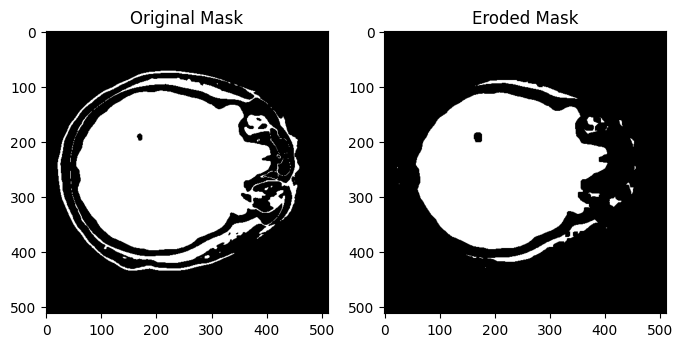

In [9]:
from scipy.ndimage import binary_erosion, generate_binary_structure
# erode
mask = np.zeros(gt_img_brain.shape, dtype=bool)
mask[(gt_img_brain>0) & (gt_img_brain < 100)] = 1
print(mask.shape)
structure = np.ones((6,6))
mask_eroded = np.zeros_like(mask, dtype=bool)
for i in range(mask.shape[2]):
    mask_eroded[:, :, i] = binary_erosion(mask[:, :, i], structure=structure, iterations=1)



# plot side by side
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(mask[:, :, 0], cmap='gray')
plt.title('Original Mask')
plt.subplot(1, 2, 2)
plt.imshow(mask_eroded[:, :, 0], cmap='gray')
plt.title('Eroded Mask')

# mae
mae_brain_motion_eroded, _, rmse_brain_motion_eroded, _, ssim_brain_motion_eroded,psnr_brain_motion_eroded = ff.compare(condition_img_brain[mask_eroded==1], gt_img_brain[mask_eroded==1], cutoff_low = 0, cutoff_high = 100)
mae_brain_supervised_eroded, _, rmse_brain_supervised_eroded, _, ssim_brain_supervised_eroded,psnr_brain_supervised_eroded = ff.compare(supervised_img_brain[mask_eroded==1], gt_img_brain[mask_eroded==1], cutoff_low = 0, cutoff_high = 100)
mae_brain_ddpm_eroded, _, rmse_brain_ddpm_eroded, _, ssim_brain_ddpm_eroded,psnr_brain_ddpm_eroded = ff.compare(ddpm_img_brain[mask_eroded==1], gt_img_brain[mask_eroded==1], cutoff_low = 0, cutoff_high = 100)
# mae_brain_ddpm_beta0_eroded, _, rmse_brain_ddpm_beta0_eroded, _, ssim_brain_ddpm_beta0_eroded,psnr_brain_ddpm_beta0_eroded = ff.compare(ddpm_beta0_img_brain[mask_eroded==1], gt_img_brain[mask_eroded==1], cutoff_low = 0, cutoff_high = 100)
mae_brain_ddpm_avg_20_eroded, _, rmse_brain_ddpm_avg_20_eroded, _, ssim_brain_ddpm_avg_20_eroded,psnr_brain_ddpm_avg_20_eroded = ff.compare(ddpm_avg_20_img_brain[mask_eroded==1], gt_img_brain[mask_eroded==1], cutoff_low = 0, cutoff_high = 100)

print('motion: ', mae_brain_motion_eroded, rmse_brain_motion_eroded, ssim_brain_motion_eroded, psnr_brain_motion_eroded)
print('supervised eroded:', mae_brain_supervised_eroded, rmse_brain_supervised_eroded, ssim_brain_supervised_eroded, psnr_brain_supervised_eroded)
print('ddpm eroded:', mae_brain_ddpm_eroded, rmse_brain_ddpm_eroded, ssim_brain_ddpm_eroded, psnr_brain_ddpm_eroded)
# print('ddpm_beta0 eroded:', mae_brain_ddpm_beta0_eroded, rmse_brain_ddpm_beta0_eroded, ssim_brain_ddpm_beta0_eroded, psnr_brain_ddpm_beta0_eroded)
print('ddpm_avg_20 eroded:', mae_brain_ddpm_avg_20_eroded, rmse_brain_ddpm_avg_20_eroded, ssim_brain_ddpm_avg_20_eroded, psnr_brain_ddpm_avg_20_eroded)


In [11]:
affine = nb.load(gt_file).affine

gt_img_brain2 = np.copy(gt_img_brain)

gt_img_brain2[gt_img_brain <= 10] = 0
gt_img_brain2[gt_img_brain >= 90] = 0
gt_img_brain2[(gt_img_brain > 10) & (gt_img_brain < 90)] = 1

nb.save(nb.Nifti1Image(gt_img_brain2, affine), os.path.join('/mnt/camca_NAS/denoising/binary.nii.gz'))

In [12]:
affine = nb.load(gt_file).affine

# save gt_img_brain
nb.save(nb.Nifti1Image(gt_img_brain, affine), os.path.join('/mnt/camca_NAS/denoising/gt.nii.gz'))

# save condition_img_brain
nb.save(nb.Nifti1Image(condition_img_brain, affine), os.path.join('/mnt/camca_NAS/denoising/condition.nii.gz'))

# save supervised_img_brain
nb.save(nb.Nifti1Image(supervised_img_brain, affine), os.path.join('/mnt/camca_NAS/denoising/supervised.nii.gz'))
nb.save(nb.Nifti1Image(np.abs(supervised_img_brain-gt_img_brain), affine), os.path.join('/mnt/camca_NAS/denoising/supervised_diff.nii.gz'))

# save ddpm_img_brain
nb.save(nb.Nifti1Image(ddpm_img_brain, affine), os.path.join('/mnt/camca_NAS/denoising/ddpm.nii.gz'))

# save ddpm_avg_20_img_brain
nb.save(nb.Nifti1Image(ddpm_avg_20_img_brain, affine), os.path.join('/mnt/camca_NAS/denoising/ddpm_avg_20.nii.gz'))
nb.save(nb.Nifti1Image(np.abs(ddpm_avg_20_img_brain-gt_img_brain), affine), os.path.join('/mnt/camca_NAS/denoising/ddpm_avg_20_diff.nii.gz'))

nb.save(nb.Nifti1Image(np.abs(condition_img_brain-gt_img_brain), affine), os.path.join('/mnt/camca_NAS/denoising/condition_diff.nii.gz'))

nb.save(nb.Nifti1Image(np.abs(ddpm_img_brain-gt_img_brain), affine), os.path.join('/mnt/camca_NAS/denoising/ddpm_diff.nii.gz'))

